In [12]:
import re
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import date
import numpy as np

In [2]:
measure_file_name = 'D:/Project/Rail/RailMeasure/out/build/x64-Release/src/Gui/logs/rail_measure.log'
server_file_name = 'D:/Project/Rail/RailMeasure/out/build/x64-Release/src/Gui/logs/camera_server.log'
image_file_name = 'D:/Project/Rail/RailMeasure/out/build/x64-Release/src/Gui/logs/AnalysisAlignment.log'

In [3]:
# 客户端和服务器同步时间误差
synchronize_error_list = []
with open(measure_file_name,'r') as f:
    line_number = 0
    for line in f:
        line_number += 1
        if 'ServerTime' in line:
            number_list = re.findall(r'T[12]{1}:(\d+)', line)
            time_1 = int(number_list[0])
            time_2 = int(number_list[1])
            error = time_2 - time_1
            synchronize_error_list.append(error)
            #if error > 1:
            #    print('line:', line_number, 'error:', error, line)

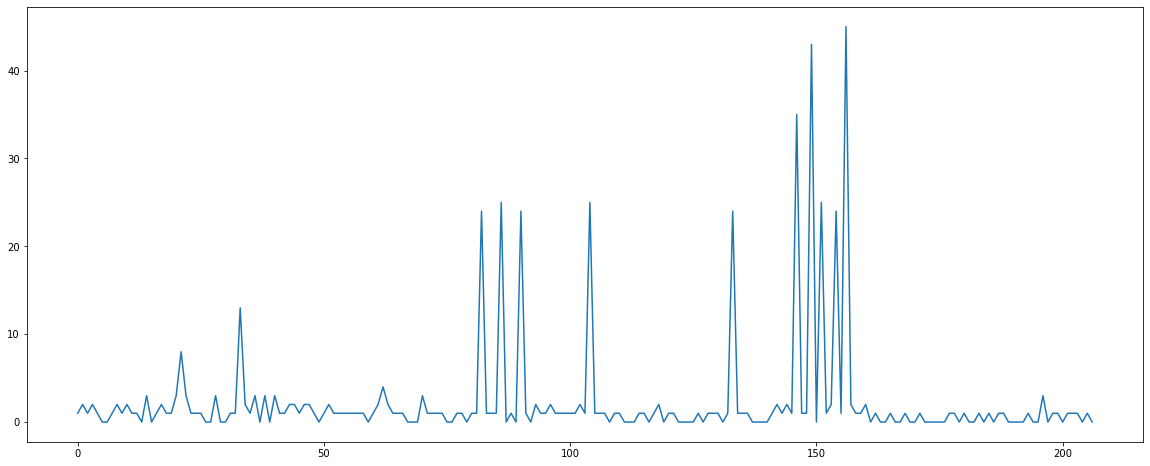

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(synchronize_error_list)

In [5]:
# 客户端和服务器同步时间误差
time_offset_list = []
with open(server_file_name,'r') as f:
    line_number = 0
    for line in f:
        line_number += 1
        if 'Timestamp' in line:
            time_list = re.findall(r'\[(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}).\d{3}\]', line)
            
            number_list = re.findall(r'offset ([-]?\d+)ms', line)
            time_offset = int(number_list[0])
            time_offset_list.append(time_offset)
            
            #print(line_number, time_list[0], time_offset)
            #print('line:', line_number, 'time_offset:', time_offset, line)

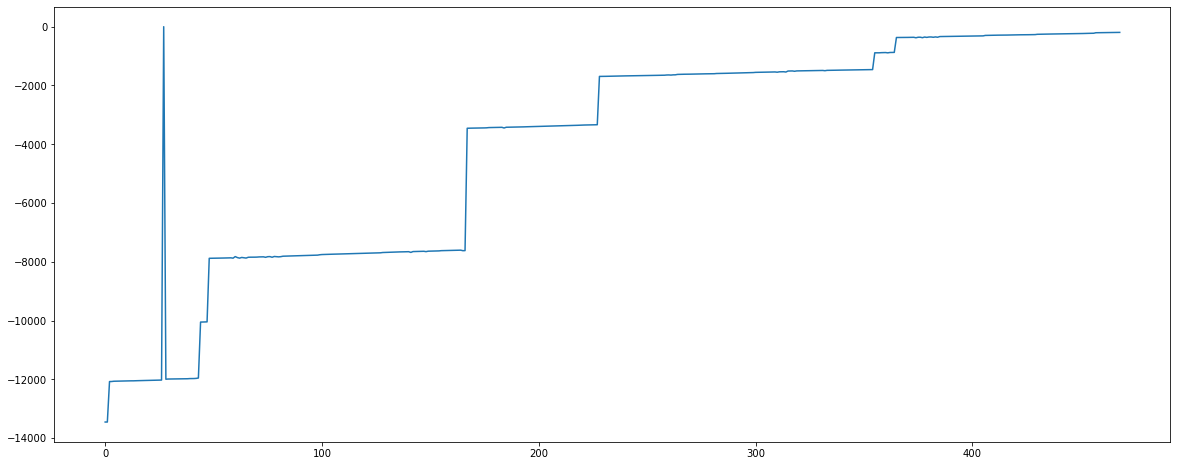

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(time_offset_list)
plt.show()

In [21]:
# 2D和3D位置对齐分析
time_2d_offset = [[]]
with open(image_file_name,'r') as f:
    line_number = 0
    laser_timestamp = 0
    offset_n = []
    for line in f:
        line_number += 1
        if 'Find 2D image' in line:
            start_time_list = re.findall(r'timestamp:(\d+)', line)
            laser_timestamp = int(start_time_list[0])
            time_2d_offset.append(offset_n)
            offset_n = []
        if 'Image 2D' in line:
            number_list = re.findall(r'timestamp\(ms\):(\d+), (\d+), (\d+), (\d+)', line)
            t1 = int(number_list[0][0]) - laser_timestamp
            t2 = int(number_list[0][1]) - laser_timestamp
            t3 = int(number_list[0][2]) - laser_timestamp
            t4 = int(number_list[0][3]) - laser_timestamp
            offset_t = np.average([t1, t2, t3, t4])
            offset_n.append(offset_t)

In [22]:
time_2d_offset

[[],
 [],
 [2.0, 55.25, 108.75, 162.25, 215.75],
 [9.0, 62.75, 116.0, 169.25, 222.75],
 [-14.0, 39.75, 92.75, 146.25, 199.75],
 [-28.25, 25.25, 78.75, 132.25, 185.75, 239.0]]